In [112]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters

In [113]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [114]:
len(train_data)

8982

In [115]:
len(test_data)

2246

In [116]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [117]:
train_labels[10]

np.int64(3)

In [118]:
for i in range(1, 11, 2):
  print(train_labels[i])

4
4
4
3
16


In [119]:
max(max(i) for i in train_data)

9999

In [120]:
word_index = reuters.get_word_index()
reversed_word_index = dict(
    (value,  key) for (key, value) in word_index.items()
)
decoded_review = " ".join([reversed_word_index.get(i-3, "?") for i in train_data[0]])
print(decoded_review)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [121]:
train_labels[0]

np.int64(3)

In [122]:
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [123]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [124]:
def to_one_hot(labels, dimension = 46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [125]:
y_train.shape

(8982, 46)

In [126]:
y_test.shape

(2246, 46)

In [127]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [128]:
# definition
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

In [129]:
# compile
model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [130]:
# fit
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
          partial_y_train,
          epochs = 20,
          batch_size = 512,
          validation_data = (x_val,  y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.4324 - loss: 3.1558 - val_accuracy: 0.6400 - val_loss: 1.7944
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6643 - loss: 1.6289 - val_accuracy: 0.6990 - val_loss: 1.3849
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7350 - loss: 1.2383 - val_accuracy: 0.7360 - val_loss: 1.2020
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7768 - loss: 1.0015 - val_accuracy: 0.7570 - val_loss: 1.1011
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8278 - loss: 0.8076 - val_accuracy: 0.7820 - val_loss: 1.0012
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8543 - loss: 0.6773 - val_accuracy: 0.7860 - val_loss: 0.9747
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8810 - loss: 0.5624 - val_accuracy: 0.7990 - val_loss: 0.9196
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9083 - loss: 0.4686 - val_accuracy: 0.8120 - 

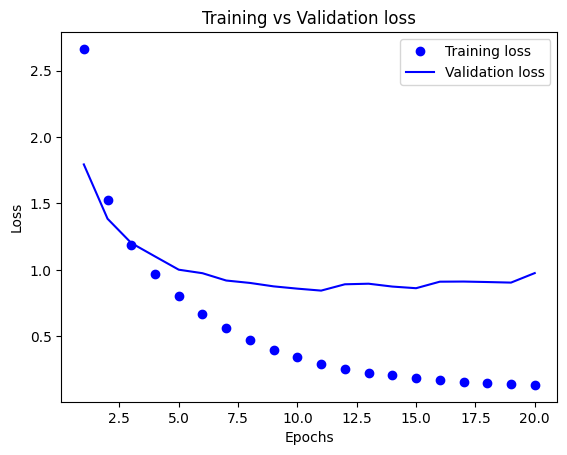

In [131]:
# plot
history_dict = history.history
history_dict.keys()

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training vs Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

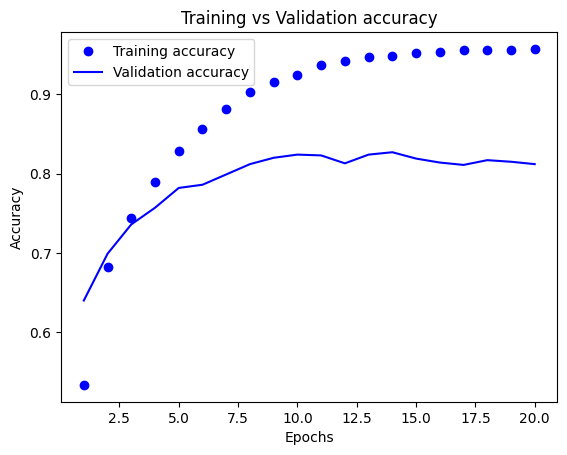

In [132]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation accuracy")
plt.legend()
plt.show()
# 82%

In [133]:
# scratch for that epoch
# definition
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

# compile
model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])
# fit

model.fit(x_train,
          y_train,
          epochs = 20,
          batch_size = 512)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.3840 - loss: 3.1897
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6405 - loss: 1.6797
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7467 - loss: 1.2030
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8002 - loss: 0.9642
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8300 - loss: 0.7853
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8585 - loss: 0.6483
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8828 - loss: 0.5523
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9030 - loss: 0.4633
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9190 - loss: 0.3957
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9285 - loss: 0.3422
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9379 - loss: 0.2909
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy:

In [134]:
# evaluate
results = model.evaluate(x_test, y_test)

print(f"Loss: {results[0]:.4f}")
print(f"Accuracy: {results[1]:.2f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7964 - loss: 1.0328
Loss: 1.0445
Accuracy: 0.79


In [135]:
# predict
predictions = model.predict(x_test)
predictions[0]

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([2.1886327e-08, 3.5114971e-07, 1.3335838e-08, 9.9879313e-01,
       6.5448252e-04, 1.5131485e-10, 7.1682891e-08, 2.1196616e-08,
       2.6257959e-04, 1.4759718e-07, 6.7974995e-08, 4.3993419e-05,
       1.8540501e-07, 4.1540752e-06, 5.5180603e-08, 4.7202292e-10,
       2.3530413e-06, 6.2596783e-08, 4.1653458e-08, 1.1266348e-05,
       9.3088071e-05, 4.2610613e-05, 1.4493375e-08, 1.7360981e-06,
       1.7109401e-10, 1.9752993e-06, 1.6909580e-07, 1.3122056e-07,
       3.3647368e-08, 9.3114659e-06, 4.5669868e-08, 5.0585578e-07,
       7.4904927e-09, 2.2308486e-06, 1.5747030e-08, 4.3010840e-07,
       5.5159377e-05, 1.3853179e-07, 1.3198245e-06, 1.6138451e-05,
       2.8853606e-08, 1.5381344e-06, 1.2045405e-07, 6.8502874e-09,
       7.3657889e-09, 2.0275468e-08], dtype=float32)

In [136]:
predictions[0].shape

(46,)

In [137]:
np.max(predictions[0])

np.float32(0.9987931)

In [138]:
np.argmax(predictions[0])

np.int64(3)

In [139]:
np.argmax(y_test[0])

np.int64(3)

In [140]:
np.sum(predictions[0])

np.float32(0.99999964)

In [141]:
# labels:
# 1) one hot encoding labels: categorical_crossentropy
# 2) integer labels: sparse_categorical_crossentropy

In [142]:
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(4, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

# compile
model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

# fit
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
          partial_y_train,
          epochs = 20,
          batch_size = 512,
          validation_data = (x_val,  y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.3878 - loss: 3.5892 - val_accuracy: 0.5380 - val_loss: 2.9596
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5405 - loss: 2.8113 - val_accuracy: 0.5480 - val_loss: 2.4156
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5493 - loss: 2.3039 - val_accuracy: 0.5570 - val_loss: 2.0752
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5527 - loss: 2.0024 - val_accuracy: 0.5680 - val_loss: 1.8734
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5788 - loss: 1.8126 - val_accuracy: 0.5860 - val_loss: 1.7233
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5975 - loss: 1.6349 - val_accuracy: 0.5970 - val_loss: 1.6354
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6191 - loss: 1.5511 - val_accuracy: 0.6190 - val_loss: 1.5692
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6442 - loss: 1.4150 - val_accuracy: 0.6380 - 

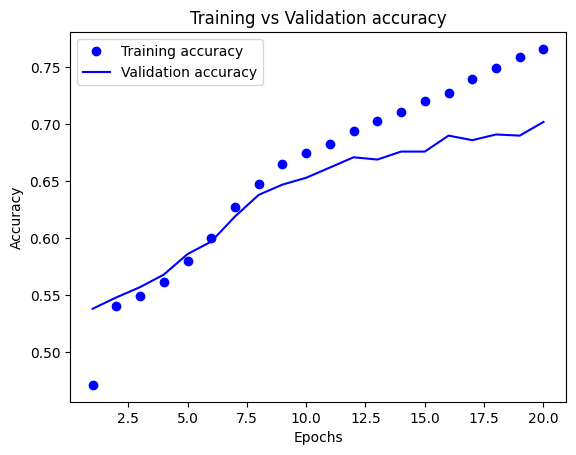

In [143]:
history_dict = history.history

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation accuracy")
plt.legend()
plt.show()

# Drop of ~ 10%, that is, 71-72% in validation accuracy due to information bottleneck in layer which has lower dimensional units

In [144]:
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

# compile
model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

# fit
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
          partial_y_train,
          epochs = 20,
          batch_size = 512,
          validation_data = (x_val,  y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.4057 - loss: 3.1600 - val_accuracy: 0.6030 - val_loss: 1.7729
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6564 - loss: 1.5941 - val_accuracy: 0.6950 - val_loss: 1.3509
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7303 - loss: 1.2078 - val_accuracy: 0.7430 - val_loss: 1.1801
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7909 - loss: 0.9642 - val_accuracy: 0.7600 - val_loss: 1.0849
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8270 - loss: 0.7912 - val_accuracy: 0.7830 - val_loss: 0.9966
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8599 - loss: 0.6404 - val_accuracy: 0.7890 - val_loss: 0.9590
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8818 - loss: 0.5382 - val_accuracy: 0.8140 - val_loss: 0.8898
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9056 - loss: 0.4379 - val_accuracy: 0.8070 - 

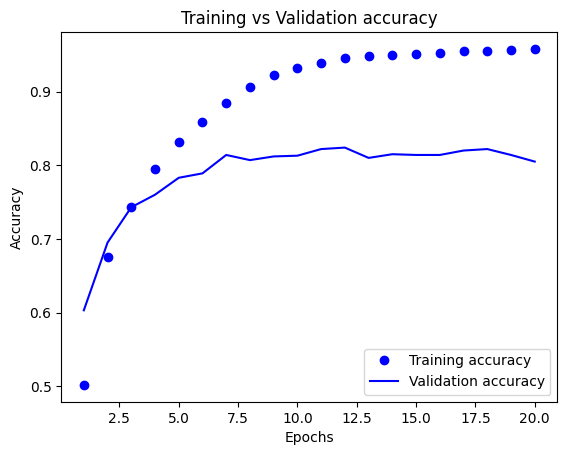

In [145]:
history_dict = history.history

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation accuracy")
plt.legend()
plt.show()
# 81%

In [146]:
model = keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

# compile
model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

# fit
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
          partial_y_train,
          epochs = 20,
          batch_size = 512,
          validation_data = (x_val,  y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.3275 - loss: 3.2262 - val_accuracy: 0.5700 - val_loss: 1.8798
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5687 - loss: 1.7690 - val_accuracy: 0.6450 - val_loss: 1.5537
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6784 - loss: 1.4097 - val_accuracy: 0.6630 - val_loss: 1.4186
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7119 - loss: 1.1752 - val_accuracy: 0.6610 - val_loss: 1.4312
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7168 - loss: 1.0953 - val_accuracy: 0.7180 - val_loss: 1.2232
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7791 - loss: 0.8541 - val_accuracy: 0.7300 - val_loss: 1.1764
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8289 - loss: 0.6794 - val_accuracy: 0.7590 - val_loss: 1.0813
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8500 - loss: 0.6027 - val_accuracy: 0.7640 - 

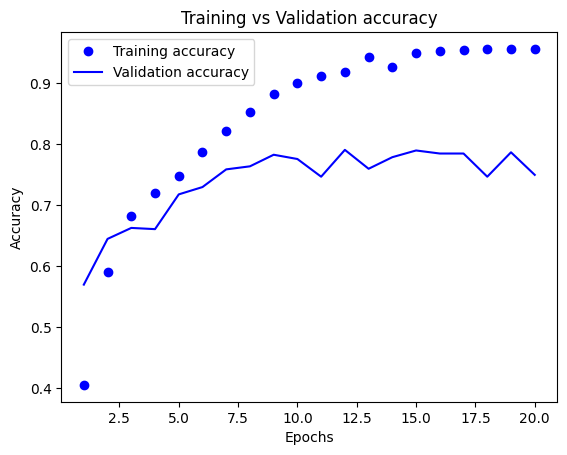

In [147]:
history_dict = history.history

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation accuracy")
plt.legend()
plt.show()
# 80%